**The dataset contains information about video game sales, including details such as the game's rank, name, platform, release year, genre, publisher, and sales figures in different regions (North America, Europe, Japan, and other regions), as well as global sales.**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Dataset and reading the data.**

In [2]:
#loading the data
data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

data #We are reading the data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Exploring the dataset and number of rows & columns, ranges of values.**

In [3]:
#Exploring the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.describe() #Reading the basic statistics of the dataset.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Showing the top 5 rows of the dataset.**

In [5]:
data.head(5)  #Top five rows.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Checking for the missing values in the dataset.**

In [6]:
data.isnull().sum() #checking for missing values.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Handling the N/A values in the year, publisher column.**

In [7]:
data['Year'].fillna(method='ffill', inplace=True) # Handling missing values in 'Year' column

data['Publisher'].fillna('Unknown', inplace=True) # Handling missing values in 'Publisher' column

**Question 1: Which genre game has the highest number of global sales?**

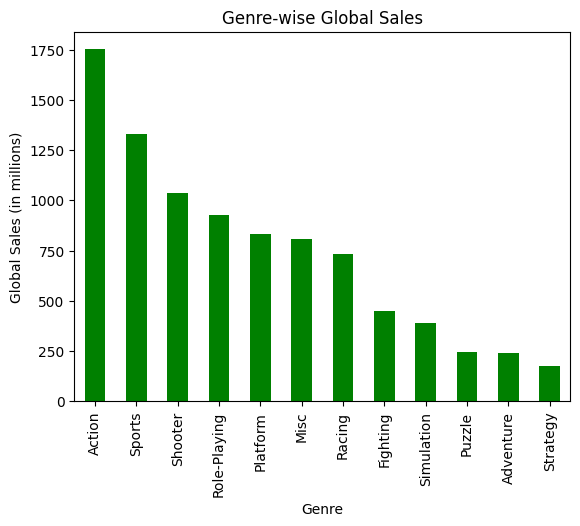

In [8]:
# Ceating which genre has highest global sales. 
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)  

#Creating the first visualization.
genre_sales.plot(kind='bar', color='green')
plt.title('Genre-wise Global Sales')    #labelling the data
plt.xlabel('Genre')  #labelling the x-label
plt.ylabel('Global Sales (in millions)') #labelling the y-label
plt.show()

**The above bar chart shows the action genre has the highest Global sales.**

**Question 2: Which publisher has the highest number of games?**

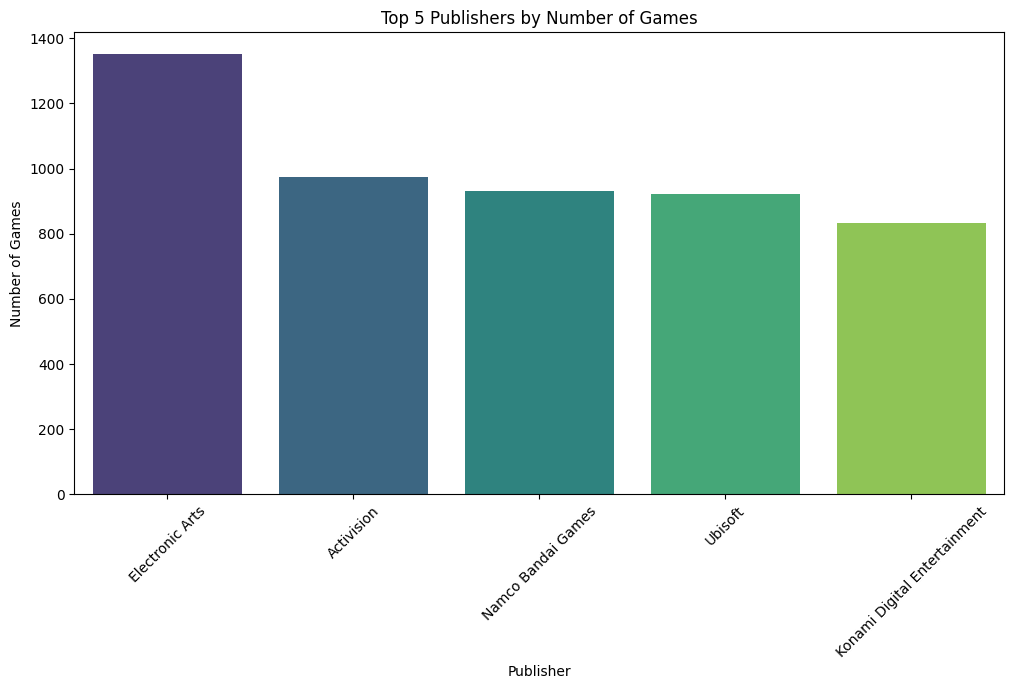

In [9]:
#Creating which publishers has highest number of games.
top_publishers = data['Publisher'].value_counts().sort_values(ascending=False).head(5)

#Creating the second visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top 5 Publishers by Number of Games') #labelling the data.
plt.xlabel('Publisher')  #labelling the x-label.
plt.ylabel('Number of Games') #labelling the y-label.

plt.xticks(rotation=45)
plt.show()


**The bar chart displays the top 5 games released by each publisher, where electronic art has the highest number of games.**

**Question 3: What is the global sales evolution over the years?**

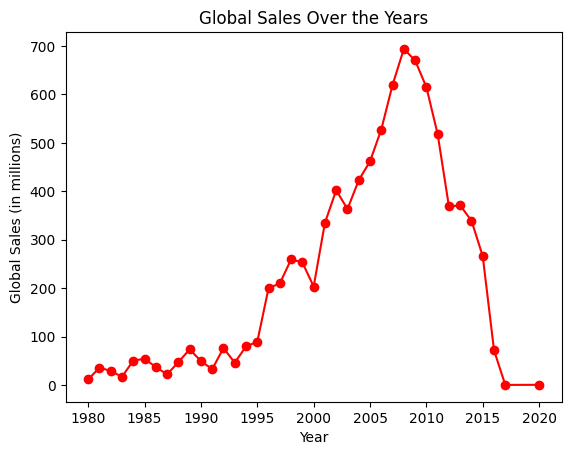

In [10]:
# Group by 'Year' and sum global sales for each year
yearly_sales = data.groupby('Year')['Global_Sales'].sum()

#Creating the third visualization.
yearly_sales.plot(kind='line', marker='o', color='red')
plt.title('Global Sales Over the Years')   #labelling the data.
plt.xlabel('Year')  #labelling the x-label.
plt.ylabel('Global Sales (in millions)') #labelling the y-label.
plt.show()

**The line plot shows Global sales have been decreasing over the years.**

**Question 4: Which genre game has the highest number of counts?**

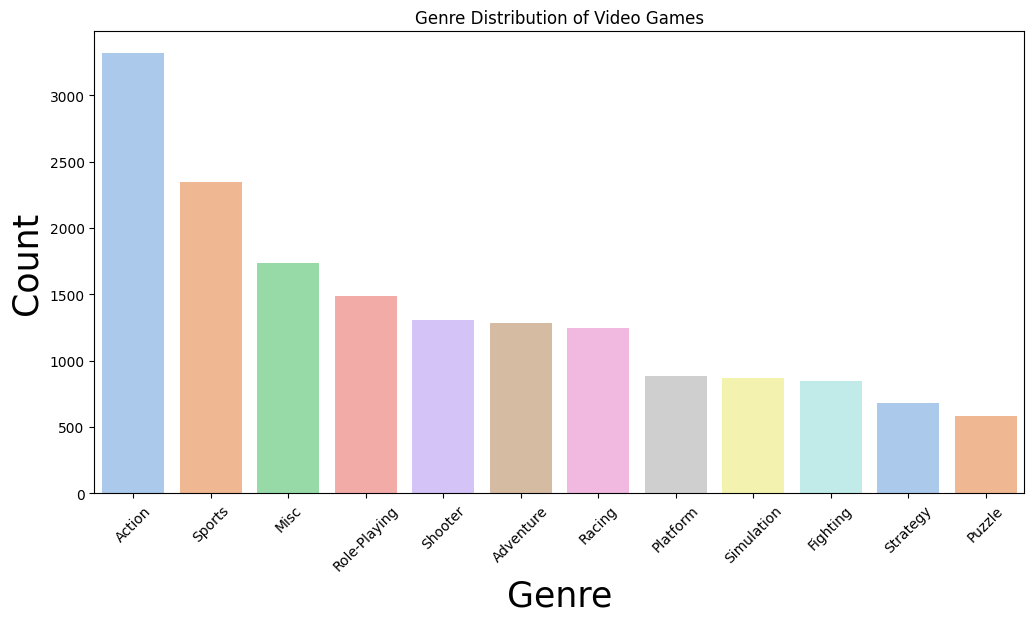

In [11]:
#Creating which genre has highest number of counts.
genre_counts = data['Genre'].value_counts()

#Creating the fourth visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel')
plt.title('Genre Distribution of Video Games')   #labelling the data. 
plt.xlabel('Genre',fontsize=25)   #labelling the x-label.
plt.ylabel('Count',fontsize=25)   #labelling the y-label.
plt.xticks(rotation=45)
plt.show()


**The bar chart shows action genre game has the highest number of counts.**

**Question 5: Which region has the highest number of total sales?**

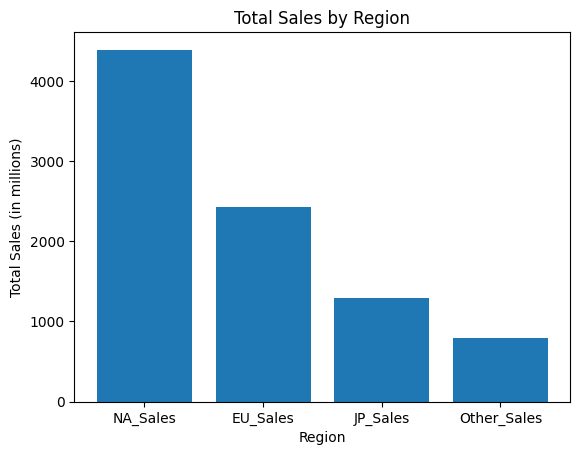

In [12]:

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = data[regions].sum()

plt.bar(regions, sales_data)
plt.title('Total Sales by Region')  # labelling the data.
plt.xlabel('Region')  # labelling the x-label
plt.ylabel('Total Sales (in millions)') # labelling the y-label.
plt.show()


**This bar chart shows total sales by each region in which NA_sales has the highest number of total sales.**

**SUMMARY**

**The dataset proivides valuable insights into the gaming industry, showing trends in global slaes, popular genre, top publisher, and regional sales distribution.
Action games dominates both in terms of sales and count,while Elctronic Arts stands out as the leading publisher.
The analysis also highlights a declining trend in global sales over the years, suggesting potential shifts or challenges in the gaming market.**